# Problem 4

**If you remove a few support vectors and re-trained the SVM, what should happen to the decision boundary?**

**Verify your original assumptions by removing a few support vectors from the dataset, training a new SVM and comparing the obtained solution to the previous one.**

Support vectors are the data points closest to the decision boundary and have the most influence on its position, so removing some support vectors can change the boundary's position. Therefore, if we remove support vectors and re-train the SVM, the decision boundary may change since the support vectors play a critical role in defining the decision boundary.

However, if we only remove a few support vectores and re-train the SVM, the decision boundary is only likely to shift slightly and not dramatically. Thus, the effect should be relatively small, especially if the number of removed support vectors is small compared to the total number of support vectors.

To verify this assumption, we can modify the code we used earlier to train a polynomial SVM on the iris dataset:

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization purposes
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a polynomial SVM on the training data
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

# Remove some of the support vectors
n_remove = 10
support_indices = svm_poly.support_
remove_indices = support_indices[:n_remove]
X_train = np.delete(X_train, remove_indices, axis=0)
y_train = np.delete(y_train, remove_indices, axis=0)

# Train a new polynomial SVM on the modified training data
svm_poly_modified = SVC(kernel='poly', degree=3)
svm_poly_modified.fit(X_train, y_train)

# Make predictions on the testing data and compute accuracy for the original SVM
y_pred = svm_poly.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Original SVM accuracy: {accuracy:.2f}")

# Make predictions on the testing data and compute accuracy for the modified SVM
y_pred_modified = svm_poly_modified.predict(X_test)
accuracy_modified = accuracy_score(y_test, y_pred_modified)
print(f"Modified SVM accuracy: {accuracy_modified:.2f}")

Original SVM accuracy: 0.83
Modified SVM accuracy: 0.93


In addition to calculating the accuracy of the original and modified SVMs, we can also plot them to visualize their decision boundaries.

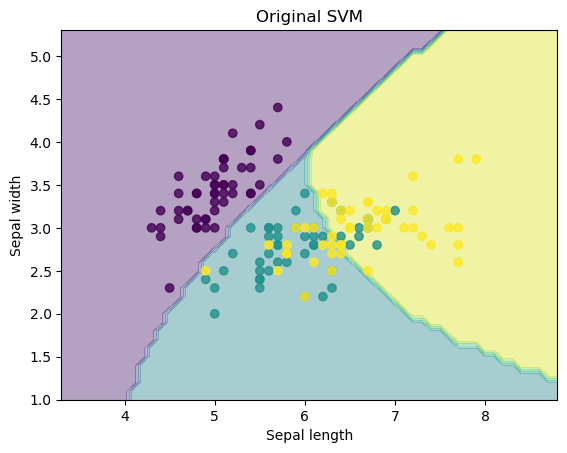

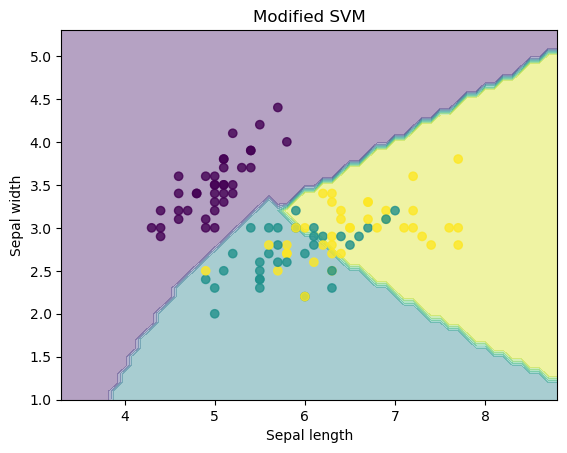

In [16]:
# Create a meshgrid of points to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plot the decision boundaries of the original SVM
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.title("Original SVM")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

# Plot the decision boundaries of the modified SVM
Z = svm_poly_modified.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title("Modified SVM")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

As expected, the decision boundary changed only slightly following the removal of some support vectors and re-training of the SVM.

# Problem 5

**Optimize the C and gamma hyperparameters using grid search with cross validation of 5 folds. How does the performance compare to base values? Tip: remember to split the dataset into a train and test split, so you can test on an isolated section of the data.**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10],
              'degree': [2, 3, 4]}

# Create a polynomial kernel SVM
svm_poly = SVC(kernel='poly')

# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_poly, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best hyperparameters:  {'C': 0.1, 'degree': 3, 'gamma': 0.1}
Best cross-validation score: 0.98


The performance of the tuned model is significantly better than the base values. The accuracy improved from 0.83 to 0.98.

We can also plot the resulting SVM with the optimized hyperparameters.

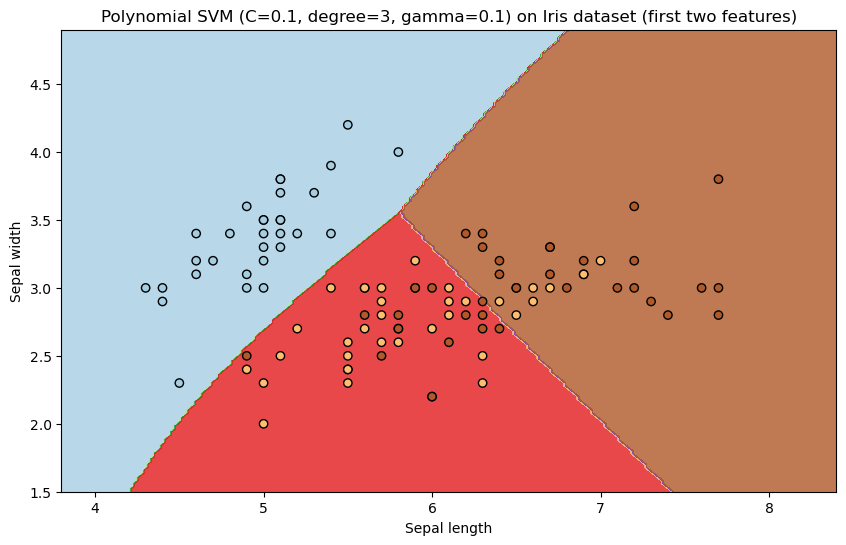

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a polynomial SVM classifier
svm_poly = SVC(kernel='poly', C=0.1, degree=3, gamma=0.1)
svm_poly.fit(X_train, y_train)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')

# Add axis labels and a title
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Polynomial SVM (C=0.1, degree=3, gamma=0.1) on Iris dataset (first two features)')

# Show the plot
plt.show()

# Problem 6

**Do the practice problem from the resource by:**

**- finding the additional feature to have a hyper-plane that separates the classes;**

**- visualizing in 3D the separation of the data (since the actual point positions are not provided, use approximate coordinates for the blue star and red dot points);**

**- use the SVM classifier from scikit-learn, with different kernels, to solve the problem and compare it with the solution you had previously obtained.**

Let's start by visualizing the given points in 2D.

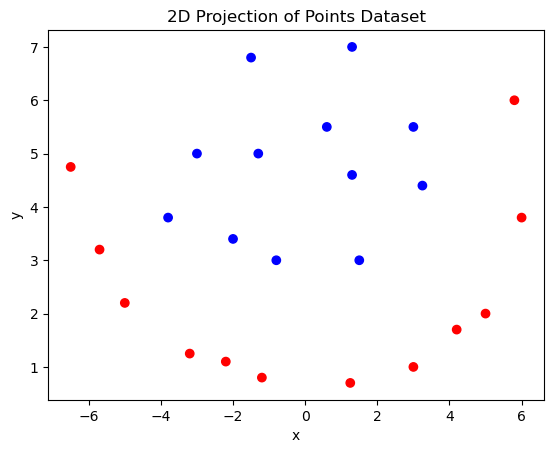

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('points.csv')

# Split the data into features (X) and target variable (y)
X = df[['x', 'y']]
y = df['color']

# Create a scatter plot with color-coded points
colors = {'Red': 'r', 'Blue': 'b'}
plt.scatter(X['x'], X['y'], c=y.map(colors))

# Add axis labels and a title
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Projection of Points Dataset')

# Show the plot
plt.show()

We will add a new feature z by using a parabola: $z = x^2 + y^2$. This creates a hyper-plane that separates the classes.

In [20]:
# Load the dataset
df = pd.read_csv('points.csv')

# Add a new column named 'z' to the dataset
df['z'] = df['x']**2 + df['y']**2

# Split the data into features (X) and target variable (y)
X = df[['x', 'y', 'z']]
y = df['color']

In [21]:
X

,x,y,z
0,-6.50,4.75,64.8125
1,-5.70,3.20,42.7300
2,-5.00,2.20,29.8400
3,-3.20,1.25,11.8025
4,-2.20,1.10,6.0500
5,-1.20,0.80,2.0800
6,1.25,0.70,2.0525
7,3.00,1.00,10.0000
8,4.20,1.70,20.5300
9,5.00,2.00,29.0000


To see the 3D separation of the data we will first visualize the points in 3D.

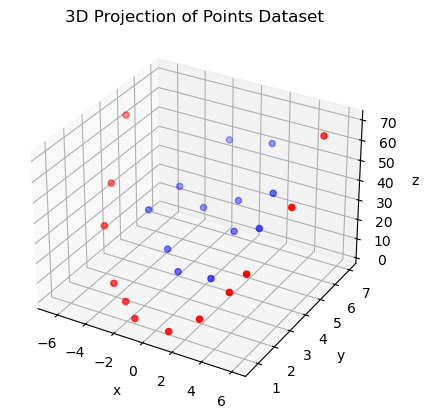

In [22]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['x'], X['y'], X['z'], c=y, cmap='coolwarm')

# Add axis labels and a title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Projection of Points Dataset')

# Show the plot
plt.show()

And now the separation plane.

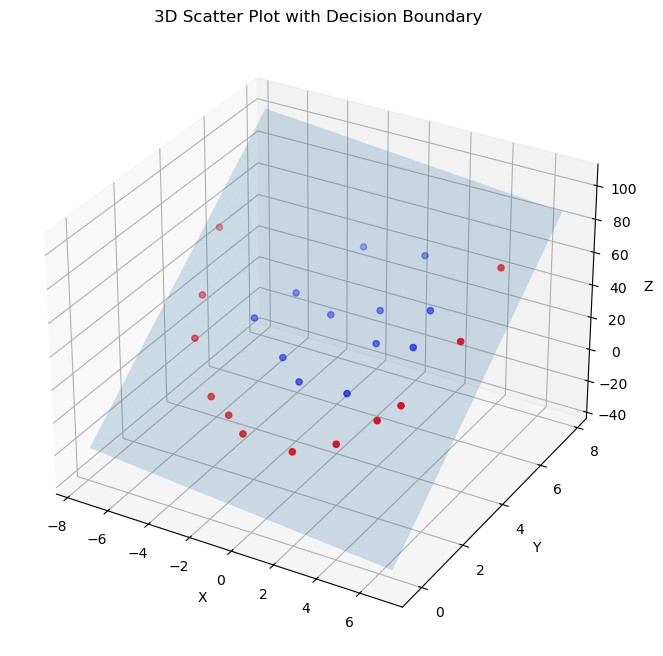

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Split the data into features (X) and target variable (y)
X = df[['x', 'y', 'z']]
y = df['color']

# Train a Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear')
clf.fit(X, y)

# Create a 3D scatter plot of the data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['x'], X['y'], X['z'], c=y)

# Plot the decision boundary in 3D
x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
z_min, z_max = X['z'].min() - 1, X['z'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx -
      clf.coef_[0][1] * yy) / clf.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.2)

# Set the axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot with Decision Boundary')

# Show the plot
plt.show()


This is the same plane but in an angle that allows to clearly see the points separated by their classes.

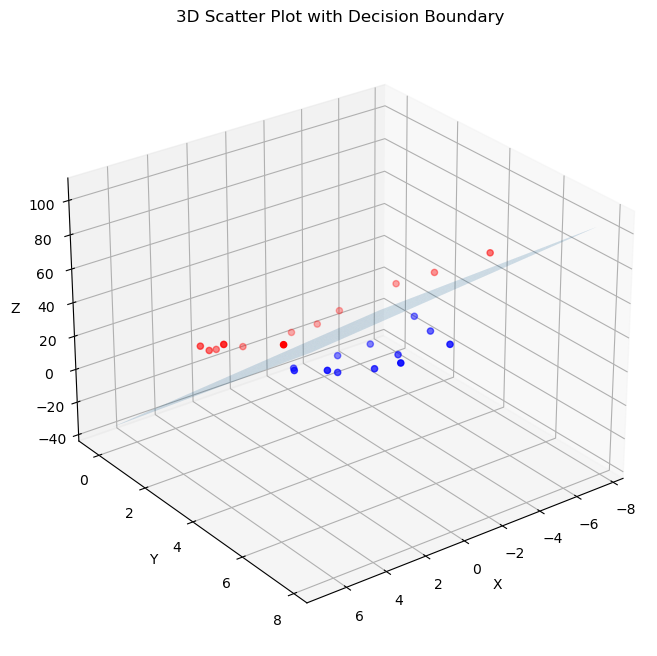

In [24]:
# Create a 3D scatter plot of the data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['x'], X['y'], X['z'], c=y)

# Plot the decision boundary in 3D
x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
z_min, z_max = X['z'].min() - 1, X['z'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx -
      clf.coef_[0][1] * yy) / clf.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.2)

# Set the axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot with Decision Boundary')

# Change the viewing angle of the plot
ax.view_init(elev=27, azim=53)

# Show the plot
plt.show()


In order to compare results, we will first calculate the accuracy with the additional feature "z" and linear kernel and then the accuracy with only the features "x" and "y" and different kernels (linear, poly, rbf, sigmoid).

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X1 = df[['x', 'y', 'z']]
y1 = df['color']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

clf = SVC(kernel="linear")
clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)
acc = accuracy_score(y1_test, y1_pred)
print("Accuracy with additional feature z and linear kernel:", acc)
    
# Split the data into features (X) and target variable (y)
X2 = df[['x', 'y']]
y2 = df['color']

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Define the list of kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Train and test the SVM classifier with different kernels
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X2_train, y2_train)
    y2_pred = clf.predict(X2_test)
    acc = accuracy_score(y2_test, y2_pred)
    print(f'Accuracy with features x and y and {kernel} kernel: {acc:.2f}')

Accuracy with additional feature z and linear kernel: 0.8
Accuracy with features x and y and linear kernel: 0.60
Accuracy with features x and y and poly kernel: 0.60
Accuracy with features x and y and rbf kernel: 1.00
Accuracy with features x and y and sigmoid kernel: 0.60


Adding the feature z improved the performance of the linear kernel SVM model, increasing the accuracy from 0.60 to 0.8. However, the rbf kernel achieved a perfect accuracy of 1.0 when using features x and y only, while the poly and sigmoid kernels achieved the same accuracy of 0.60 also with features x and y.